In [6]:
!pip install -q yfinance

Dataset Shape: (619040, 7)
        date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
Pivoted Shape: (1259, 505)
Selected Stocks: Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN'],
      dtype='object', name='Name')
Returns Shape: (1258, 20)
Train: (880, 20), Val: (251, 20), Test: (127, 20)
Train Features Shape: (790, 120)
Train Targets Shape: (790, 190)
Test dates: 37, Test features: 37


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │        19,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 190)            │         6,270 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,854 (100.99 KB)

 Trainable params: 25,854 (100.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.6702 - mae: 0.3640 - val_loss: 0.4148 - val_mae: 0.2261
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4547 - mae: 0.3356 - val_loss: 0.2700 - val_mae: 0.2124
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3147 - mae: 0.3141 - val_loss: 0.1797 - val_mae: 0.2018
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2244 - mae: 0.2936 - val_loss: 0.1247 - val_mae: 0.1936
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1703 - mae: 0.2809 - val_loss: 0.0924 - val_mae: 0.1871
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1298 - mae: 0.2592 - val_loss: 0.0745 - val_mae: 0.1828
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1061 - mae: 0.2431 - val_loss: 0.0652 - val_mae: 0.1805
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0902 - mae: 0.2296 - val_loss: 0.0618 - val_mae: 0.1807
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0811 - mae:

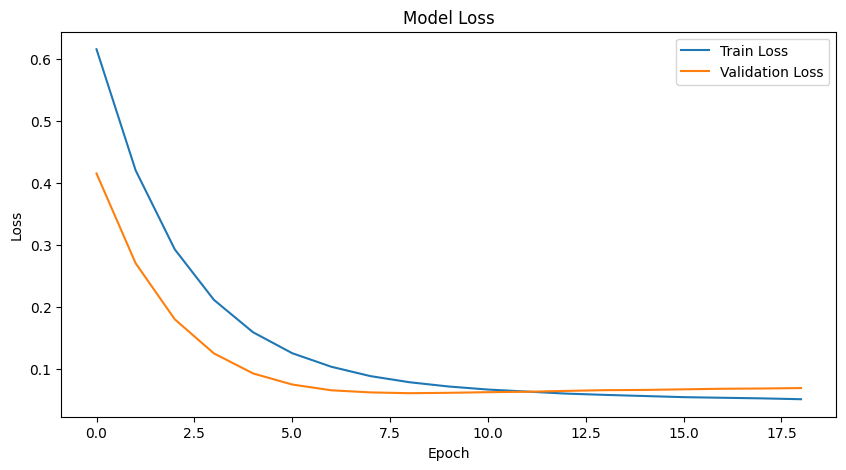

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Test MSE: 0.0520, Test MAE: 0.1819


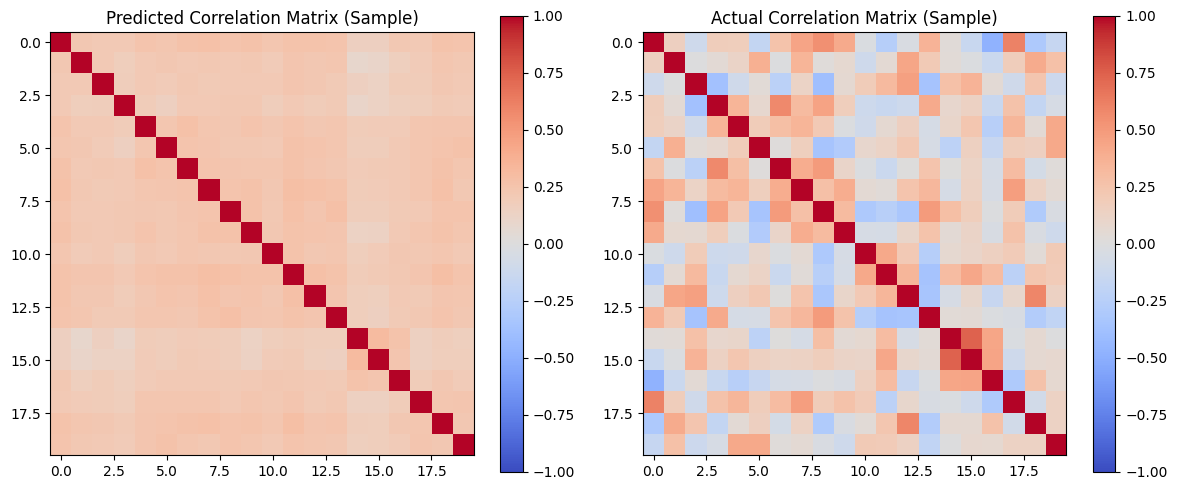

Starting rolling backtest with 1 windows...

Backtest Window 1:
  Return: 0.7452, Volatility: 0.1090, Sharpe Ratio: 6.7471, Max Drawdown: 0.0118

--- Plotting Figure 5: Cumulative Returns ---


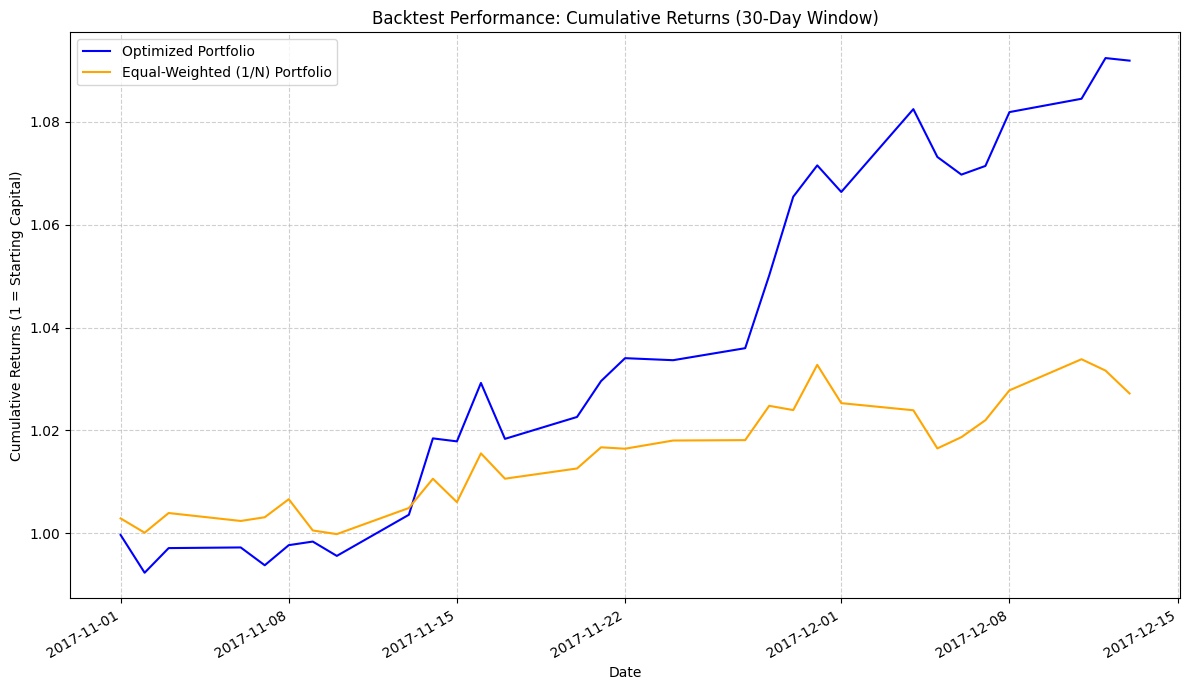


--- Overall Backtest Statistics ---

Optimized Portfolio:
  Annualized Return: 0.7452
  Annualized Volatility: 0.1077
  Sharpe Ratio: 6.8255
  Max Drawdown: 0.0118

Equal-Weighted (1/N) Portfolio:
  Annualized Return: 0.2280
  Annualized Volatility: 0.0710
  Sharpe Ratio: 3.0707
  Max Drawdown: 0.0157


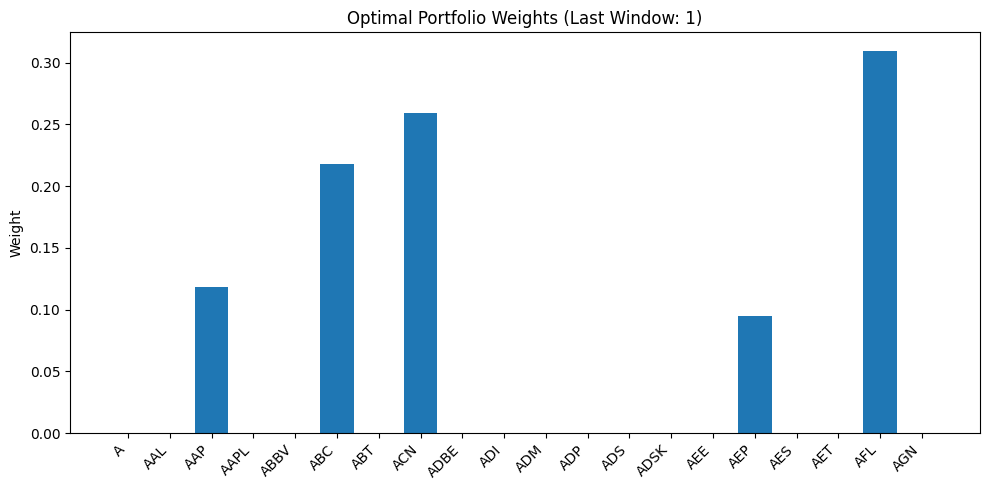

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import scipy.optimize as sco
import os
import warnings
warnings.filterwarnings('ignore')


data_path = '/kaggle/input/sandp500/all_stocks_5yr.csv'
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Error: Data file not found at {data_path}")
    print("Please update the 'data_path' variable to the correct location of 'all_stocks_5yr.csv'")
    
    raise

df['date'] = pd.to_datetime(df['date'])
print("Dataset Shape:", df.shape)
print(df.head())


pivot_df = df.pivot(index='date', columns='Name', values='close')
print("Pivoted Shape:", pivot_df.shape)


stock_subset = pivot_df.columns[:20]
pivot_df = pivot_df[stock_subset]
print("Selected Stocks:", stock_subset)


returns = pivot_df.pct_change().dropna()
print("Returns Shape:", returns.shape)


train_size = int(0.7 * len(returns))
val_size = int(0.2 * len(returns))
test_size = len(returns) - train_size - val_size
train_returns = returns.iloc[:train_size]
val_returns = returns.iloc[train_size:train_size + val_size]
test_returns = returns.iloc[train_size + val_size:]
print(f"Train: {train_returns.shape}, Val: {val_returns.shape}, Test: {test_returns.shape}")


def create_features_and_targets(returns, window=60, forecast_horizon=30):
    n_stocks = returns.shape[1]
    features = []
    targets = []
    
    dates = returns.index[window:-forecast_horizon] 
    
    for t in range(window, len(returns) - forecast_horizon):
        
        window_data = returns.iloc[t-window:t]
        
        feat = []
        for stock in returns.columns:
            stock_returns = window_data[stock]
            lagged = stock_returns.values[-5:] 
            volatility = stock_returns.rolling(window=20).std().iloc[-1]
            feat.extend(lagged.tolist() + [volatility if not np.isnan(volatility) else 0])
        
        
        future_window = returns.iloc[t:t+forecast_horizon]
        
        
        corr_matrix = future_window.corr().values
        
        lower_tri_indices = np.tril_indices(n_stocks, k=-1)
        lower_tri = corr_matrix[lower_tri_indices]
        
        
        if not np.any(np.isnan(lower_tri)):
            features.append(feat)
            targets.append(lower_tri)
        else:
            
            dates = dates.drop(returns.index[t])
            
    return np.array(features), np.array(targets), dates

window_size = 60
forecast_horizon = 30
train_features, train_targets, train_dates = create_features_and_targets(train_returns, window_size, forecast_horizon)
val_features, val_targets, val_dates = create_features_and_targets(val_returns, window_size, forecast_horizon)
test_features, test_targets, test_dates = create_features_and_targets(test_returns, window_size, forecast_horizon)
print("Train Features Shape:", train_features.shape)
print("Train Targets Shape:", train_targets.shape)
print(f"Test dates: {len(test_dates)}, Test features: {len(test_features)}")


scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


train_features = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
val_features = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
test_features = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])


def build_lstm_model(input_shape, output_dim):
    model = Sequential([
        LSTM(32, input_shape=input_shape),
        Dropout(0.5),
        Dense(output_dim, activation='tanh', kernel_regularizer=l2(0.01)) # 'tanh' is good for correlation (-1 to 1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

n_stocks = len(stock_subset)
n_pairs = n_stocks * (n_stocks - 1) // 2 
model = build_lstm_model(input_shape=(1, train_features.shape[2]), output_dim=n_pairs)
model.summary()

history = model.fit(
    train_features, train_targets,
    validation_data=(val_features, val_targets),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_predictions = model.predict(test_features)
test_mse = np.mean((test_predictions - test_targets) ** 2)
test_mae = np.mean(np.abs(test_predictions - test_targets))
print(f"Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}")


sample_idx = 0
tri_indices = np.tril_indices(n_stocks, k=-1)

corr_matrix_pred = np.zeros((n_stocks, n_stocks))
corr_matrix_actual = np.zeros((n_stocks, n_stocks))

corr_matrix_pred[tri_indices] = test_predictions[sample_idx]
corr_matrix_pred = corr_matrix_pred + corr_matrix_pred.T + np.eye(n_stocks)

corr_matrix_actual[tri_indices] = test_targets[sample_idx]
corr_matrix_actual = corr_matrix_actual + corr_matrix_actual.T + np.eye(n_stocks)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Predicted Correlation Matrix (Sample)")

plt.imshow(corr_matrix_pred, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Actual Correlation Matrix (Sample)")

plt.imshow(corr_matrix_actual, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.tight_layout()
plt.show()




def portfolio_performance_stats(weights, returns, cov_matrix, risk_free_rate=0.01):
    """Calculates summary stats for a single window."""
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    
    
    if portfolio_vol < 1e-6:
        sharpe_ratio = 0.0
    else:
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_vol
    
    
    cum_returns = (1 + (returns @ weights)).cumprod()
    peak = cum_returns.cummax()
    drawdown = (peak - cum_returns) / peak
    max_drawdown = drawdown.max()
    return portfolio_return, portfolio_vol, sharpe_ratio, max_drawdown

def optimize_portfolio(returns, cov_matrix, risk_free_rate=0.01):
    """Finds the optimal portfolio weights to maximize the Sharpe ratio."""
    n = len(returns.columns)
    
    
    def objective(weights):
        port_ret = np.sum(returns.mean() * weights) * 252
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
        
        if port_vol < 1e-6:
            return 0 
        
        sharpe = (port_ret - risk_free_rate) / port_vol
        return -sharpe 
        
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 
    bounds = tuple((0, 1) for _ in range(n)) 
    init_guess = np.array([1/n] * n) 
    
    result = sco.minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    
    if not result.success:
        
        print(f"Warning: Optimization failed. Using equal weights for this window.")
        return init_guess
        
    return result.x


test_returns = test_returns.clip(lower=-0.1, upper=0.1)


n_windows = len(test_dates) // forecast_horizon  
results_stats = []
optimized_returns_series = []
equal_returns_series = []
equal_weights = np.array([1/n_stocks] * n_stocks)
last_optimized_weights = equal_weights 

print(f"Starting rolling backtest with {n_windows} windows...")

for i in range(n_windows):
    
    pred_idx = i * forecast_horizon
    
    
    window_start_date = test_dates[pred_idx]
    
    
    window_start_index = test_returns.index.searchsorted(window_start_date, side='left')
    
    
    if window_start_index >= len(test_returns):
        print(f"Skipping window {i+1}: Start date {window_start_date} is after all test data.")
        continue
    
    window_end_index = window_start_index + forecast_horizon
    
    if window_end_index > len(test_returns):
        print(f"Skipping window {i+1}: Not enough data for a full forecast horizon.")
        break 
        
    
    test_window = test_returns.iloc[window_start_index:window_end_index]
    
    if test_window.empty or len(test_window) < forecast_horizon:
        print(f"Skipping window {i+1}: Incomplete data.")
        continue

    
    prediction_vector = test_predictions[pred_idx]
    
    
    corr_matrix_pred = np.zeros((n_stocks, n_stocks))
    corr_matrix_pred[tri_indices] = prediction_vector
    corr_matrix_pred = corr_matrix_pred + corr_matrix_pred.T + np.eye(n_stocks)
    
    
    history_lookback = 60 
    hist_start_index = max(0, window_start_index - history_lookback)
    hist_data = test_returns.iloc[hist_start_index:window_start_index]
    
    if hist_data.empty or len(hist_data) < 2:
        
        vols = test_returns.std() 
    else:
        vols = hist_data.std()
        
    
    vols[vols == 0] = 1e-6
    vols = vols.fillna(1e-6)

    
    cov_matrix_pred = corr_matrix_pred * np.outer(vols, vols)
    
    
    eigenvalues = np.linalg.eigvals(cov_matrix_pred)
    if np.any(eigenvalues < 0):
        
        cov_matrix_pred += np.eye(n_stocks) * (-np.min(eigenvalues) + 1e-6)

    

    
    optimized_weights = optimize_portfolio(test_window, cov_matrix_pred)
    last_optimized_weights = optimized_weights 
    
    
    opt_daily_returns = test_window @ optimized_weights
    eq_daily_returns = test_window @ equal_weights
    
    
    optimized_returns_series.append(opt_daily_returns)
    equal_returns_series.append(eq_daily_returns)

    
    ret, vol, sharpe, drawdown = portfolio_performance_stats(optimized_weights, test_window, cov_matrix_pred)
    results_stats.append({
        'Window': i+1,
        'Return': ret,
        'Volatility': vol,
        'Sharpe': sharpe,
        'Max Drawdown': drawdown
    })


for res in results_stats:
    print(f"\nBacktest Window {res['Window']}:")
    print(f"  Return: {res['Return']:.4f}, Volatility: {res['Volatility']:.4f}, "
          f"Sharpe Ratio: {res['Sharpe']:.4f}, Max Drawdown: {res['Max Drawdown']:.4f}")


if not optimized_returns_series:
    print("No backtest windows were successfully processed. Cannot plot cumulative returns.")
else:
    
    all_opt_returns = pd.concat(optimized_returns_series)
    all_eq_returns = pd.concat(equal_returns_series)

    
    cumulative_opt_returns = (1 + all_opt_returns).cumprod()
    cumulative_eq_returns = (1 + all_eq_returns).cumprod()

    
    print("\n--- Plotting Figure 5: Cumulative Returns ---")
    plt.figure(figsize=(12, 7))
    
    cumulative_opt_returns.plot(label='Optimized Portfolio', color='blue')
    cumulative_eq_returns.plot(label='Equal-Weighted (1/N) Portfolio', color='orange')
    plt.title('Backtest Performance: Cumulative Returns (30-Day Window)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns (1 = Starting Capital)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    
    print("\n--- Overall Backtest Statistics ---")
    
    
    total_opt_ret = np.mean(all_opt_returns) * 252
    total_opt_vol = np.std(all_opt_returns) * np.sqrt(252)
    total_opt_sharpe = (total_opt_ret - 0.01) / total_opt_vol if total_opt_vol > 1e-6 else 0
    peak_opt = cumulative_opt_returns.cummax()
    drawdown_opt = (peak_opt - cumulative_opt_returns) / peak_opt
    max_drawdown_opt = drawdown_opt.max()

    print("\nOptimized Portfolio:")
    print(f"  Annualized Return: {total_opt_ret:.4f}")
    print(f"  Annualized Volatility: {total_opt_vol:.4f}")
    print(f"  Sharpe Ratio: {total_opt_sharpe:.4f}")
    print(f"  Max Drawdown: {max_drawdown_opt:.4f}")

    
    total_eq_ret = np.mean(all_eq_returns) * 252
    total_eq_vol = np.std(all_eq_returns) * np.sqrt(252)
    total_eq_sharpe = (total_eq_ret - 0.01) / total_eq_vol if total_eq_vol > 1e-6 else 0
    peak_eq = cumulative_eq_returns.cummax()
    drawdown_eq = (peak_eq - cumulative_eq_returns) / peak_eq
    max_drawdown_eq = drawdown_eq.max()

    print("\nEqual-Weighted (1/N) Portfolio:")
    print(f"  Annualized Return: {total_eq_ret:.4f}")
    print(f"  Annualized Volatility: {total_eq_vol:.4f}")
    print(f"  Sharpe Ratio: {total_eq_sharpe:.4f}")
    print(f"  Max Drawdown: {max_drawdown_eq:.4f}")


if results_stats:
    plt.figure(figsize=(10, 5))
    
    plt.bar(stock_subset, last_optimized_weights)
    plt.title(f"Optimal Portfolio Weights (Last Window: {results_stats[-1]['Window']})")
    plt.ylabel("Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

